# Amazon Reviews Classification EDA
```
@inproceedings{marc_reviews,
    title={The Multilingual Amazon Reviews Corpus},
    author={Keung, Phillip and Lu, Yichao and Szarvas, György and Smith, Noah A.},
    booktitle={Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing},
    year={2020}
}
```

In [75]:
# import libraries
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import sys
from wordcloud import WordCloud

In [83]:
sys.path.append("/Users/dqmis/github/nlp-classification/")

from src.review.data import processing

In [8]:
%load_ext autoreload
%autoreload 2

In [13]:
# Loading Amazon Review dataset and selecting train split

dataset = load_dataset("amazon_reviews_multi")
dataset["train"]

No config specified, defaulting to: amazon_reviews_multi/all_languages
Found cached dataset amazon_reviews_multi (/Users/dqmis/.cache/huggingface/datasets/amazon_reviews_multi/all_languages/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)
100%|██████████| 3/3 [00:00<00:00, 132.21it/s]


Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 1200000
})

In [14]:
# Converting dataset to pandas dataframe

dataset_df = pd.DataFrame(dataset["train"])

In [15]:
dataset_df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,de_0203609,product_de_0865382,reviewer_de_0267719,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,de_0559494,product_de_0678997,reviewer_de_0783625,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,de_0270868,product_de_0022613,reviewer_de_0736276,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [16]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   review_id         1200000 non-null  object
 1   product_id        1200000 non-null  object
 2   reviewer_id       1200000 non-null  object
 3   stars             1200000 non-null  int64 
 4   review_body       1200000 non-null  object
 5   review_title      1200000 non-null  object
 6   language          1200000 non-null  object
 7   product_category  1200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 73.2+ MB


Let's look at the diversity of our dataset:

Text(0.5, 1.0, 'Distribution of number of reviews per item top 100k items')

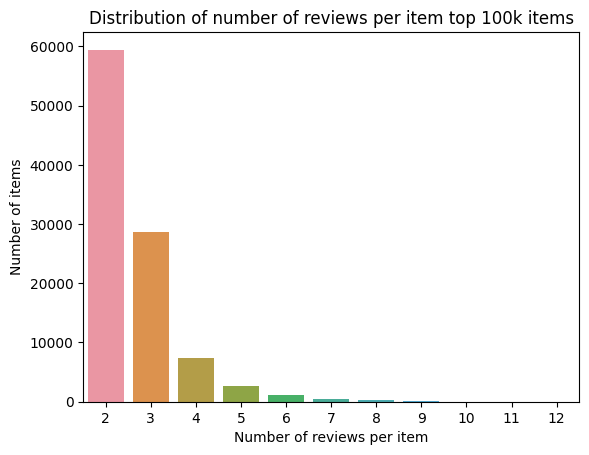

In [17]:
item_reviews_df = dataset_df.groupby("product_id").count().reset_index().sort_values("review_body", ascending=False).head(100000)
sns.countplot(x="review_body", data=item_reviews_df)
plt.xlabel("Number of reviews per item")
plt.ylabel("Number of items")
plt.title("Distribution of number of reviews per item top 100k items")

Text(0.5, 1.0, 'Distribution of number of reviews per reviewer top 100k reviewers')

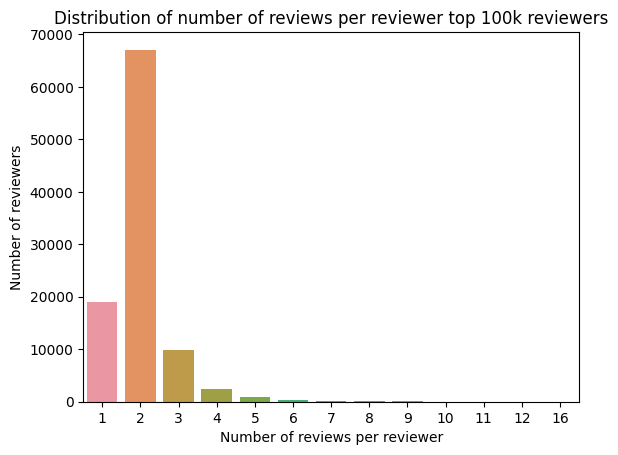

In [18]:
item_reviewers_df = dataset_df.groupby("reviewer_id").count().reset_index().sort_values("review_body", ascending=False).head(100000)
sns.countplot(x="review_body", data=item_reviewers_df)
plt.xlabel("Number of reviews per reviewer")
plt.ylabel("Number of reviewers")
plt.title("Distribution of number of reviews per reviewer top 100k reviewers")

Text(0.5, 1.0, 'Distribution of number of reviews per item category top 10 categories')

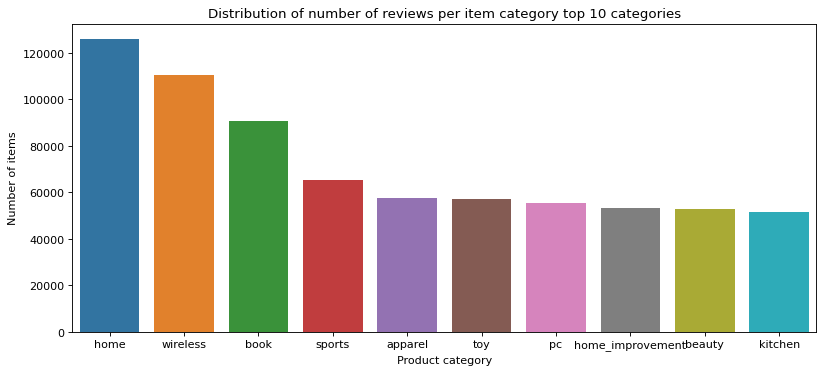

In [19]:
plt.figure(figsize=(12, 5), dpi=80)
product_category_df = dataset_df.groupby("product_category").count().reset_index().sort_values("review_body", ascending=False).head(10)
sns.barplot(x="product_category", y="review_body", data=product_category_df)
plt.xlabel("Product category")
plt.ylabel("Number of items")
plt.title("Distribution of number of reviews per item category top 10 categories")

Text(0.5, 1.0, 'Distribution of number of reviews per language')

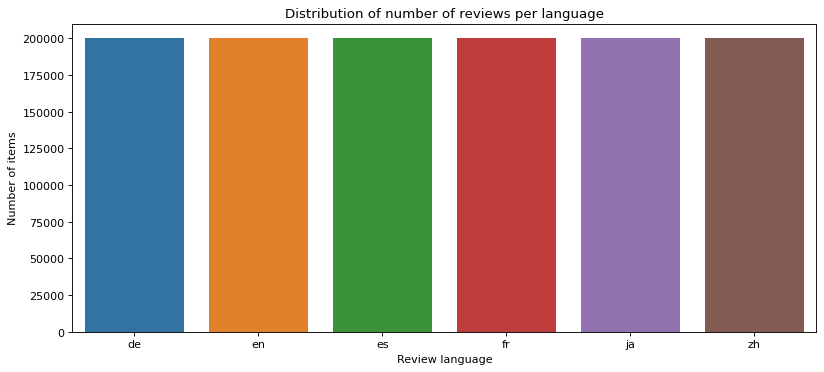

In [20]:
plt.figure(figsize=(12, 5), dpi=80)
review_language_df = dataset_df.groupby("language").count().reset_index().sort_values("review_body", ascending=False)
sns.barplot(x="language", y="review_body", data=review_language_df)
plt.xlabel("Review language")
plt.ylabel("Number of items")
plt.title("Distribution of number of reviews per language")

Text(0.5, 1.0, 'Distribution of number of reviews per star count')

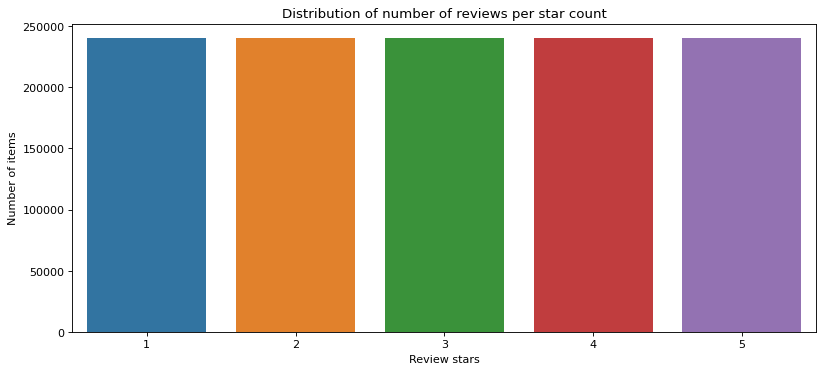

In [21]:
plt.figure(figsize=(12, 5), dpi=80)
review_stars_df = dataset_df.groupby("stars").count().reset_index().sort_values("review_body", ascending=False)
sns.barplot(x="stars", y="review_body", data=review_stars_df)
plt.xlabel("Review stars")
plt.ylabel("Number of items")
plt.title("Distribution of number of reviews per star count")

In [22]:
# Dropping columns that are not needed

dataset_df.drop(["review_id", "product_id",	"reviewer_id", "review_title", "product_category"], axis=1, inplace=True)
dataset_df

,stars,review_body,language
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,de
1,1,In der Lieferung war nur Ein Akku!,de
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",de
3,1,"Dachte, das wären einfach etwas festere Binden...",de
4,1,Meine Kinder haben kaum damit gespielt und nac...,de
...,...,...,...
1199995,5,买的时候做活动很便宜，效果真是不错，据说是纯天然的，非常滋润。,zh
1199996,5,从生活的小细节入手，虽然已经过了时代，但是很多细节还是值得我们学习,zh
1199997,5,速度快，质量也好，书的内容新颖，题目还有解析，是一本值得推荐的复习参考书。,zh
1199998,5,第一次用这么好的卡，LOL能开到300多FPS,zh


Our hypothesis: as we want to make a model that classifies reviews into positive and negative, we can omit the star rating and convert stars into boolean values:
```
if stars >= 4:
    stars = 1
else if stars <= 2:
    stars = 0
```
we omit the 3 start for being to ambiguous.

In [25]:
# Creating a label column for sentiment analysis

dataset_df["label"] = dataset_df["stars"].apply(processing.star_to_label)
dataset_df.drop("stars", axis=1, inplace=True)

In [26]:
dataset_df

,review_body,language,label
0,Armband ist leider nach 1 Jahr kaputt gegangen,de,0.0
1,In der Lieferung war nur Ein Akku!,de,0.0
2,"Ein Stern, weil gar keine geht nicht. Es hande...",de,0.0
3,"Dachte, das wären einfach etwas festere Binden...",de,0.0
4,Meine Kinder haben kaum damit gespielt und nac...,de,0.0
...,...,...,...
1199995,买的时候做活动很便宜，效果真是不错，据说是纯天然的，非常滋润。,zh,1.0
1199996,从生活的小细节入手，虽然已经过了时代，但是很多细节还是值得我们学习,zh,1.0
1199997,速度快，质量也好，书的内容新颖，题目还有解析，是一本值得推荐的复习参考书。,zh,1.0
1199998,第一次用这么好的卡，LOL能开到300多FPS,zh,1.0


For now, let's focus only on EN reviews as it is easier to work with (do not have much experience with other languages).

In [29]:
dataset_en_df = dataset_df.loc[dataset_df["language"] == "en"].drop("language", axis=1)

In [30]:
dataset_en_df

,review_body,label
200000,Arrived broken. Manufacturer defect. Two of th...,0.0
200001,the cabinet dot were all detached from backing...,0.0
200002,I received my first order of this product and ...,0.0
200003,This product is a piece of shit. Do not buy. D...,0.0
200004,went through 3 in one day doesn't fit correct ...,0.0
...,...,...
399995,"Cute slippers, my MIL loved them.",1.0
399996,My 6 year old likes this and keeps him engaged...,1.0
399997,Replaced my battery with it. Works like new.,1.0
399998,"I like them, holding up well.",1.0


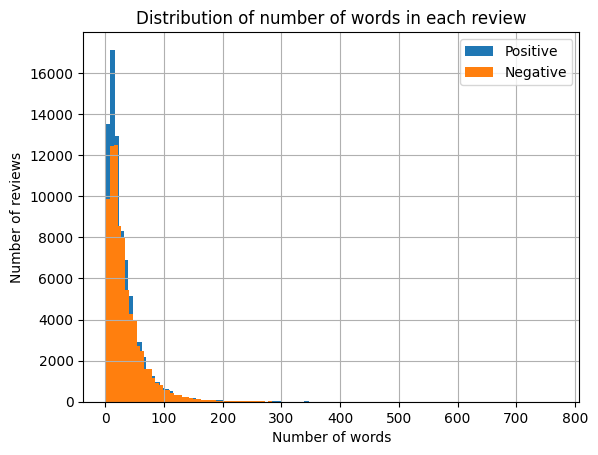

In [45]:
# Get the distribution of number of words in each positive review

dataset_en_df.loc[dataset_en_df["label"] == 1]["review_body"].apply(lambda x: len(x.split())).hist(bins=100, label="Positive")
dataset_en_df.loc[dataset_en_df["label"] == 0]["review_body"].apply(lambda x: len(x.split())).hist(bins=100, label="Negative")
plt.title("Distribution of number of words in each review")
plt.xlabel("Number of words")
plt.ylabel("Number of reviews")
plt.legend()

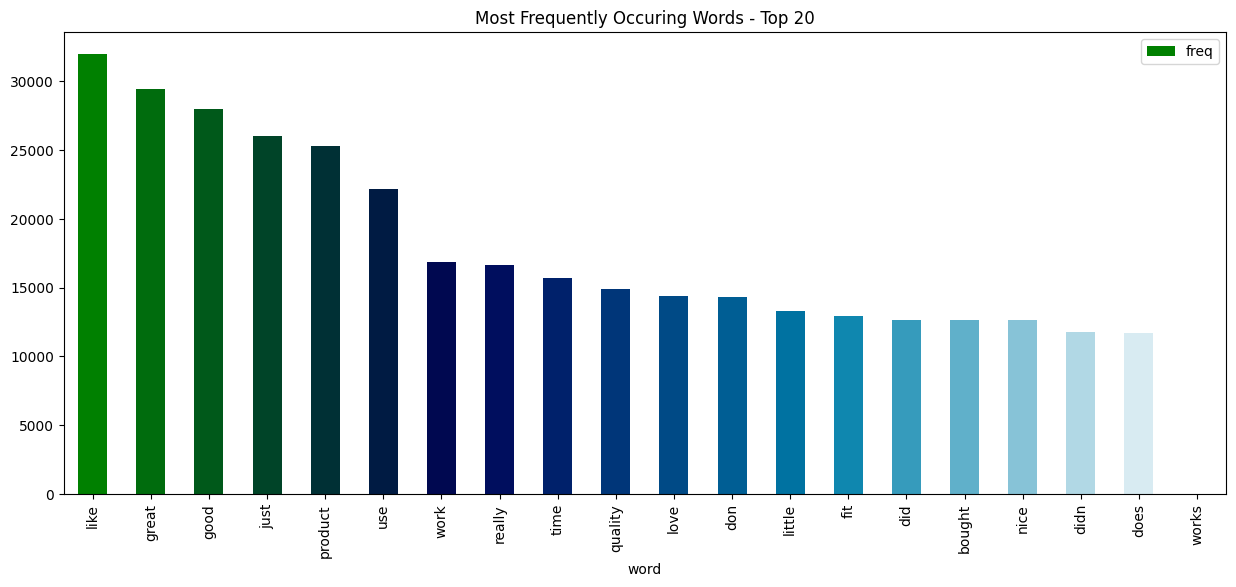

In [49]:
# Get distribution of unique words in each review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

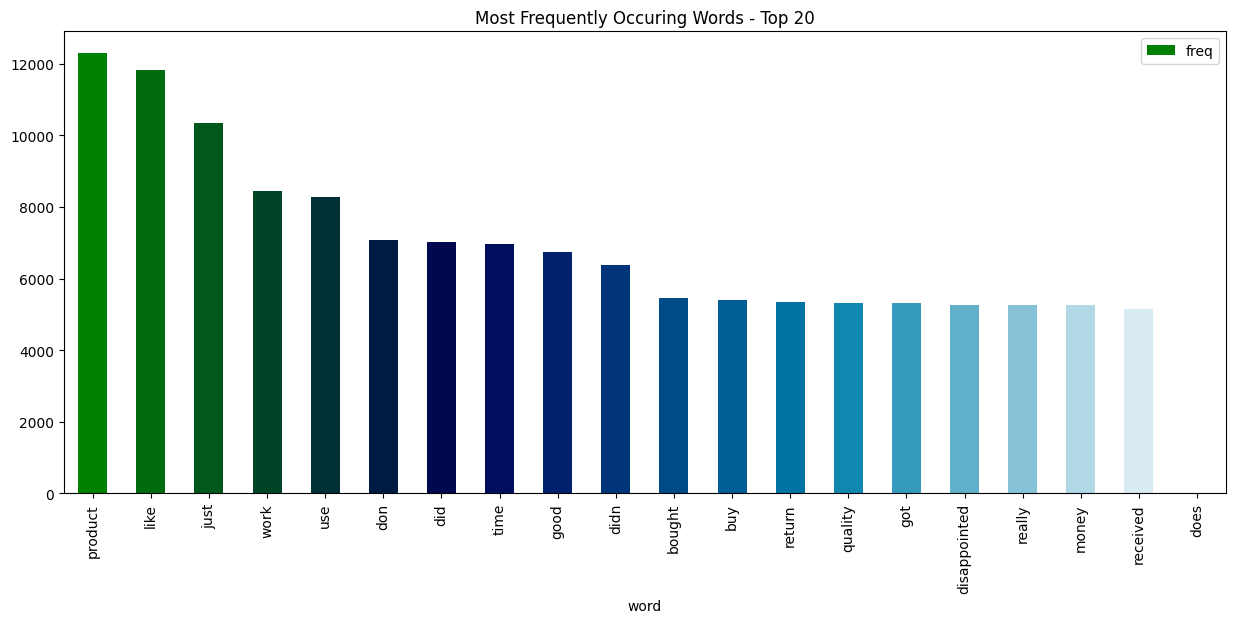

In [53]:
# Get distribution of unique words in each negative review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df.loc[dataset_en_df["label"] == 0]["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words in negative reviews - Top 20")
plt.show()

['product', 'like', 'just', 'work', 'use', 'don', 'did', 'time', 'good', 'didn']


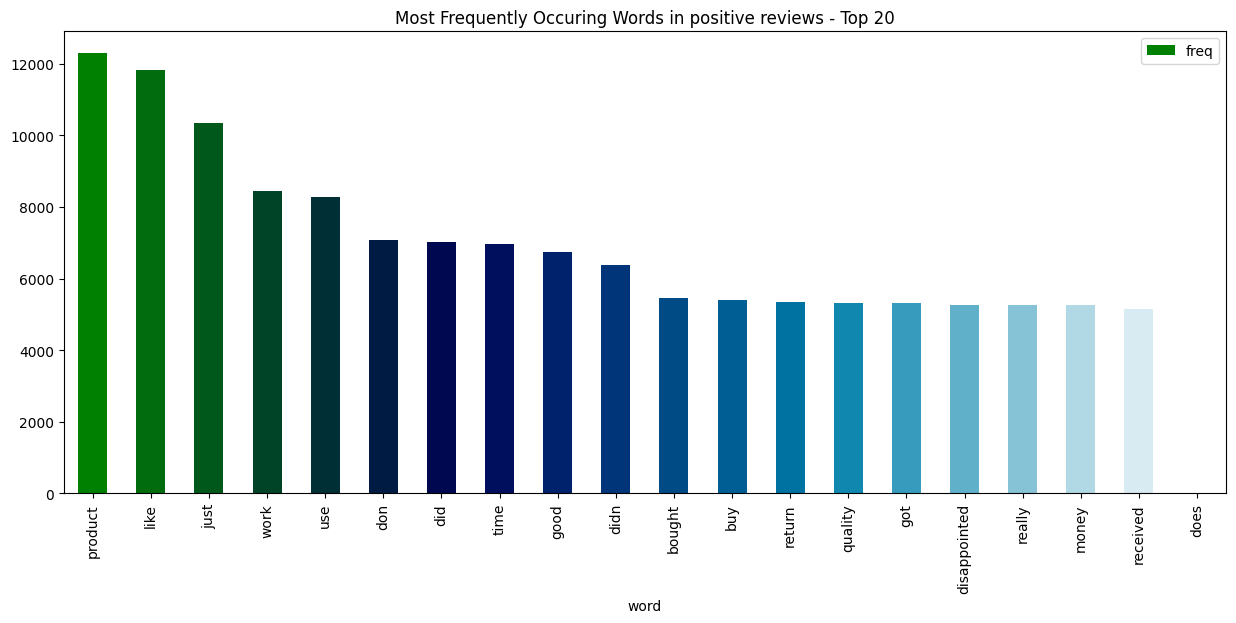

In [87]:
# Get distribution of unique words in each positive review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df.loc[dataset_en_df["label"] == 0]["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])
print(list(frequency.head(10).word.values))


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words in positive reviews - Top 20")
plt.show()

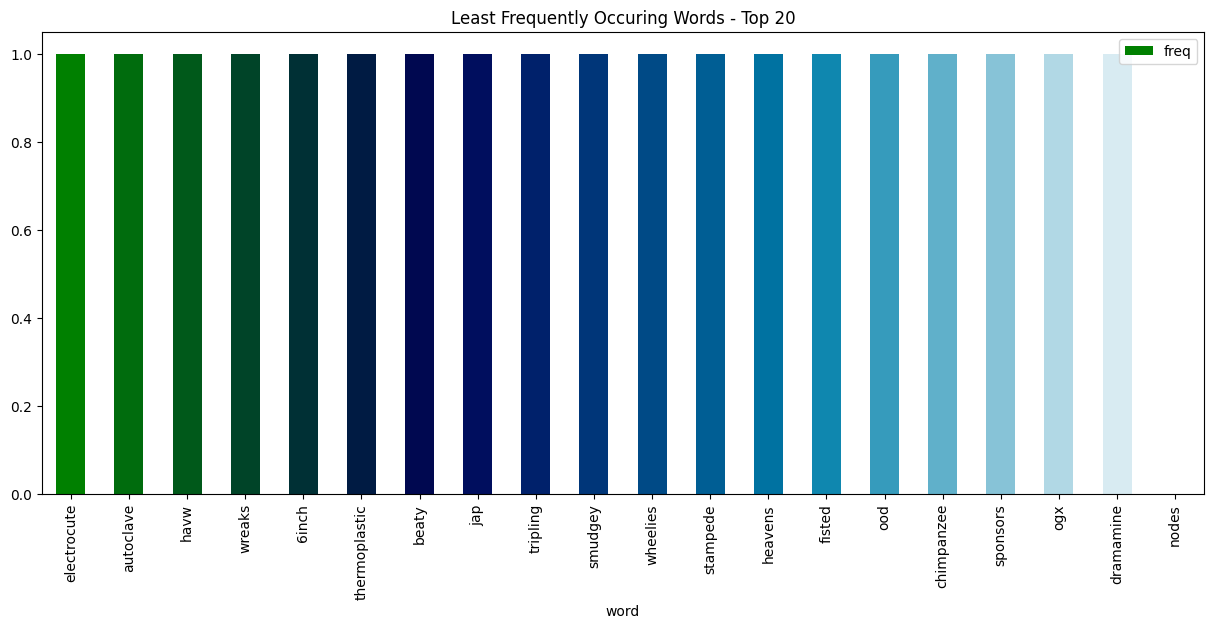

In [57]:
# Get distribution of unique words in each review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=False)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

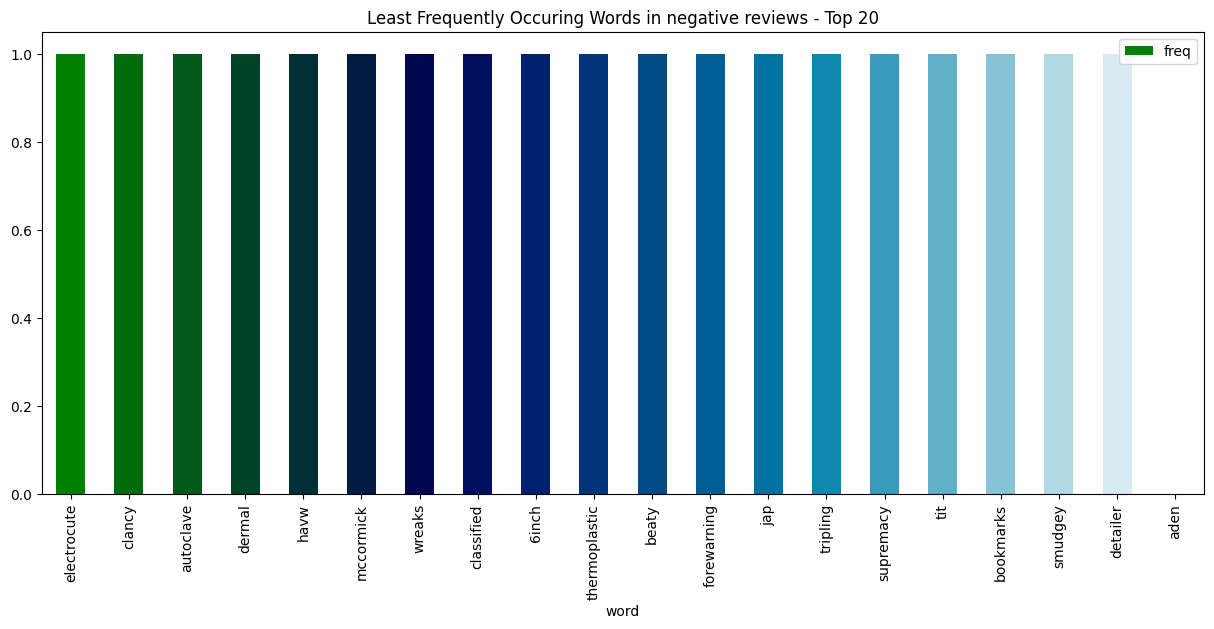

In [58]:
# Get distribution of unique words in each negative review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df.loc[dataset_en_df["label"] == 0]["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=False)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words in negative reviews - Top 20")
plt.show()

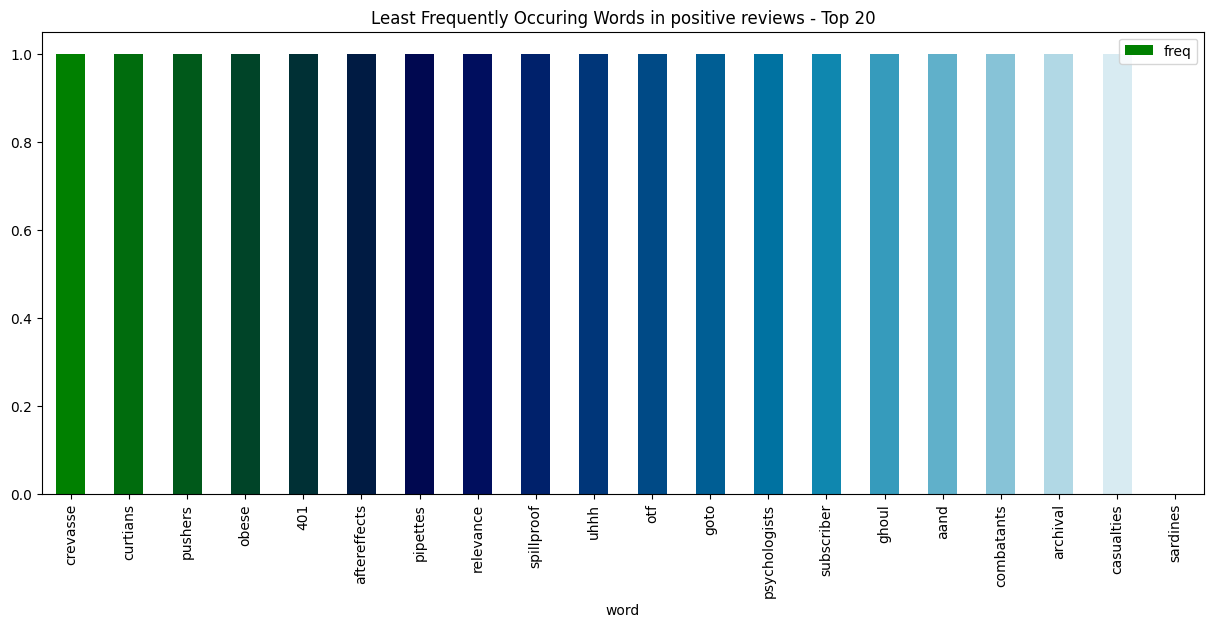

In [59]:
# Get distribution of unique words in each positive review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df.loc[dataset_en_df["label"] == 1]["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=False)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words in positive reviews - Top 20")
plt.show()

In [73]:
from nltk.util import ngrams
import collections
import nltk

text = str(dataset_en_df["review_body"])
tokenized = text.split()

bigrams = ngrams(tokenized, 3)
bigrams_freq = collections.Counter(bigrams)
bigrams_freq.most_common(20)

[(('200000', 'Arrived', 'broken.'), 1),
 (('Arrived', 'broken.', 'Manufacturer'), 1),
 (('broken.', 'Manufacturer', 'defect.'), 1),
 (('Manufacturer', 'defect.', 'Two'), 1),
 (('defect.', 'Two', 'of'), 1),
 (('Two', 'of', 'th...'), 1),
 (('of', 'th...', '200001'), 1),
 (('th...', '200001', 'the'), 1),
 (('200001', 'the', 'cabinet'), 1),
 (('the', 'cabinet', 'dot'), 1),
 (('cabinet', 'dot', 'were'), 1),
 (('dot', 'were', 'all'), 1),
 (('were', 'all', 'detached'), 1),
 (('all', 'detached', 'from'), 1),
 (('detached', 'from', 'backing...'), 1),
 (('from', 'backing...', '200002'), 1),
 (('backing...', '200002', 'I'), 1),
 (('200002', 'I', 'received'), 1),
 (('I', 'received', 'my'), 1),
 (('received', 'my', 'first'), 1)]

(-0.5, 399.5, 199.5, -0.5)

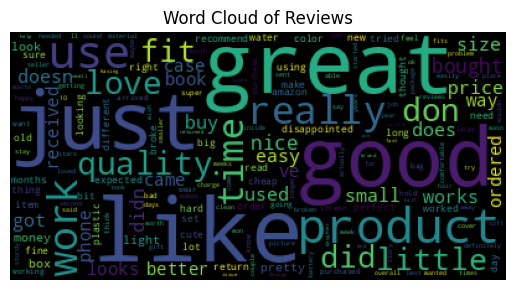

In [79]:
# Get distribution of unique words in each review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud().generate_from_frequencies(dict(words_freq))

plt.imshow(wordcloud)
plt.title("Word Cloud of Reviews")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

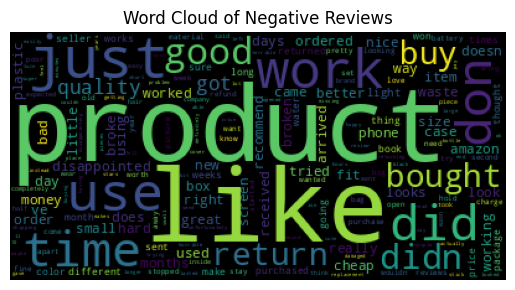

In [81]:
# Get distribution of unique words in each review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df.loc[dataset_en_df["label"] == 0]["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud().generate_from_frequencies(dict(words_freq))

plt.imshow(wordcloud)
plt.title("Word Cloud of Negative Reviews")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

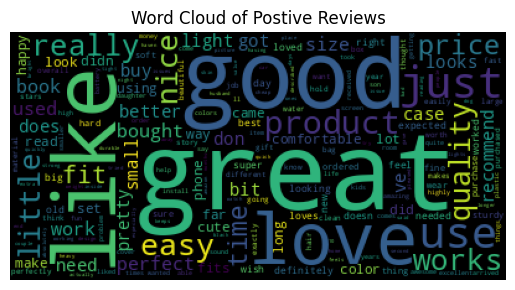

In [82]:
# Get distribution of unique words in each review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_en_df.loc[dataset_en_df["label"] == 1]["review_body"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud().generate_from_frequencies(dict(words_freq))

plt.imshow(wordcloud)
plt.title("Word Cloud of Postive Reviews")
plt.axis("off")